# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
#pip install citipy


#pip install w

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib
import seaborn as sns

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#   print(city)
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
#OpenweatherMap API Key
#api_key = "7c0ee5b84376727e62f51432f4b59731"

In [11]:
#URL for weatherMap API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
#url = "http://api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=7c0ee5b84376727e62f51432f4b59731
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7c0ee5b84376727e62f51432f4b59731


In [12]:
#list of citi data
city_data = []

In [13]:
#print to logger
print("Beggining Data Retrival")
print("----------------------")

#Create counters
record_count = 1
set_count = 1

Beggining Data Retrival
----------------------


In [83]:


#loop through all the cities in our list
for i, city in enumerate(cities):
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    #create endpoint url with each cit
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    #print(city_url)
    
    #log the url, record and set numbers
    print (f"Processing Record {record_count} of Set {set_count}) | {city}")
 
    
    #Add 1 to the record count
    record_count += 1
    
    #Run an API request for each of the cities
    try: 
        #parce the JSON and retrive data
        city_weather = requests.get(city_url).json()
        #print(city_weather)
        
        #parce out the max tem, humidity, cloudmess and wind speed
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"] 
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"] 
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #append the city into into city_data
        city_data.append({"City":city,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudness": city_clouds,
                         "Wind speed": city_wind,
                         "Country": city_country,
                         "Date":city_date})
        
# if an error experience, skip the city
    except:
        print("city not found. skipping...")
        pass

#Indicate that Data loading is complete
print("----------end------------")



Processing Record 20 of Set 13) | ribeira grande
Processing Record 21 of Set 13) | butaritari
Processing Record 22 of Set 13) | punta alta
Processing Record 23 of Set 13) | mataura
Processing Record 24 of Set 13) | kita
Processing Record 25 of Set 13) | kapaa
Processing Record 26 of Set 13) | cagayan de tawi-tawi
city not found. skipping...
Processing Record 27 of Set 13) | ushuaia
Processing Record 28 of Set 13) | fort nelson
Processing Record 29 of Set 13) | halalo
city not found. skipping...
Processing Record 30 of Set 13) | bilma
Processing Record 31 of Set 13) | irtyshskiy
Processing Record 32 of Set 13) | puerto ayora
Processing Record 33 of Set 13) | jamestown
Processing Record 34 of Set 13) | castro
Processing Record 35 of Set 13) | nikolskoye
Processing Record 36 of Set 13) | samusu
city not found. skipping...
Processing Record 37 of Set 13) | kuvshinovo
Processing Record 38 of Set 13) | yeppoon
Processing Record 39 of Set 13) | calamar
Processing Record 40 of Set 13) | isange

Processing Record 29 of Set 16) | ahipara
Processing Record 30 of Set 16) | faanui
Processing Record 31 of Set 16) | cidreira
Processing Record 32 of Set 16) | tomatlan
Processing Record 33 of Set 16) | olafsvik
Processing Record 34 of Set 16) | upernavik
Processing Record 35 of Set 16) | lusambo
Processing Record 36 of Set 16) | kaitangata
Processing Record 37 of Set 16) | beringovskiy
Processing Record 38 of Set 16) | ilulissat
Processing Record 39 of Set 16) | odweyne
Processing Record 40 of Set 16) | mar del plata
Processing Record 41 of Set 16) | lukulu
Processing Record 42 of Set 16) | khandbari
Processing Record 43 of Set 16) | geraldton
Processing Record 44 of Set 16) | labuhan
Processing Record 45 of Set 16) | san quintin
Processing Record 46 of Set 16) | tiksi
Processing Record 47 of Set 16) | viedma
Processing Record 48 of Set 16) | tahta
Processing Record 49 of Set 16) | thinadhoo
Processing Record 0 of Set 17) | tabas
Processing Record 1 of Set 17) | zhanatas
city not foun

Processing Record 8 of Set 20) | kegayli
city not found. skipping...
Processing Record 9 of Set 20) | chuy
Processing Record 10 of Set 20) | inirida
Processing Record 11 of Set 20) | burpengary
Processing Record 12 of Set 20) | kirakira
Processing Record 13 of Set 20) | poum
Processing Record 14 of Set 20) | kenai
Processing Record 15 of Set 20) | chililabombwe
Processing Record 16 of Set 20) | filadelfia
Processing Record 17 of Set 20) | sao filipe
Processing Record 18 of Set 20) | caravelas
Processing Record 19 of Set 20) | aleksandrov gay
Processing Record 20 of Set 20) | kalangala
Processing Record 21 of Set 20) | bakloh
Processing Record 22 of Set 20) | matagami
Processing Record 23 of Set 20) | sola
Processing Record 24 of Set 20) | kapuskasing
Processing Record 25 of Set 20) | grand river south east
city not found. skipping...
Processing Record 26 of Set 20) | alizai
Processing Record 27 of Set 20) | saldanha
Processing Record 28 of Set 20) | huarmey
Processing Record 29 of Set 

Processing Record 37 of Set 23) | ngukurr
city not found. skipping...
Processing Record 38 of Set 23) | gambela
Processing Record 39 of Set 23) | port hedland
Processing Record 40 of Set 23) | beidao
Processing Record 41 of Set 23) | lugovoy
Processing Record 42 of Set 23) | sim
Processing Record 43 of Set 23) | grand-santi
Processing Record 44 of Set 23) | tual
Processing Record 45 of Set 23) | san carlos de bariloche
Processing Record 46 of Set 23) | bilibino
Processing Record 47 of Set 23) | aniva
Processing Record 48 of Set 23) | araguacu
Processing Record 49 of Set 23) | skhisma
Processing Record 0 of Set 24) | tuggurt
city not found. skipping...
Processing Record 1 of Set 24) | jumla
Processing Record 2 of Set 24) | guia de isora
Processing Record 3 of Set 24) | baherden
Processing Record 4 of Set 24) | londoko
Processing Record 5 of Set 24) | tabuk
Processing Record 6 of Set 24) | baile herculane
Processing Record 7 of Set 24) | diego de almagro
Processing Record 8 of Set 24) | 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
#convert array of Json into Pandas DF
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudness,Wind speed,Country,Date
0,ribeira grande,38.5167,-28.7000,68.40,94,75,14.97,PT,1623177119
1,butaritari,3.0707,172.7902,79.75,76,72,1.72,KI,1623176796
2,punta alta,-38.8759,-62.0736,62.55,53,73,15.10,AR,1623177119
3,mataura,-46.1927,168.8643,49.48,96,100,2.39,NZ,1623176803
4,kita,13.0349,-9.4895,97.48,23,26,4.76,ML,1623177120


In [27]:
# Extract relevant field from the FataFrame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudness = city_data_pd["Cloudness"]
wind_speed = city_data_pd["Wind speed"]

In [21]:
#Export cit_data into a csv file
city_data_pd.to_csv(output_data_file, index_label="City_ID")
city_data_pd.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudness,Wind speed,Country,Date
0,ribeira grande,38.5167,-28.7000,68.40,94,75,14.97,PT,1623177119
1,butaritari,3.0707,172.7902,79.75,76,72,1.72,KI,1623176796
2,punta alta,-38.8759,-62.0736,62.55,53,73,15.10,AR,1623177119
3,mataura,-46.1927,168.8643,49.48,96,100,2.39,NZ,1623176803
4,kita,13.0349,-9.4895,97.48,23,26,4.76,ML,1623177120


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [23]:
#Show record count
city_data_pd.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudness     566
Wind speed    566
Country       566
Date          566
dtype: int64

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

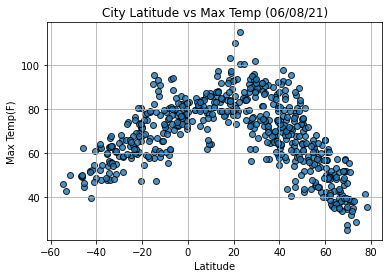

In [39]:
#Build scatter plot for latitude vs Temp
plt.scatter(lats, max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Max Temp ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")
plt.grid(True)

#Show the figure
plt.savefig("output_data/fig1.png")

#Show the plot
plt.show()

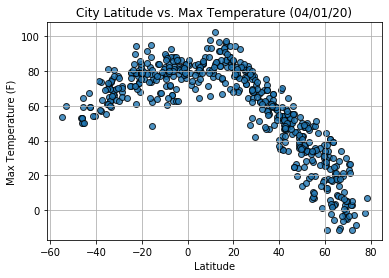

## Latitude vs. Humidity Plot

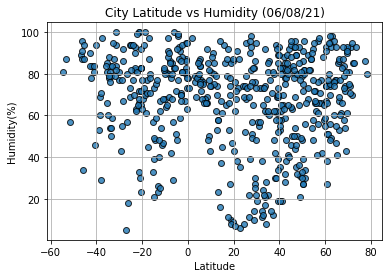

In [41]:
#Build scatter plot for latitude vs Temp
plt.scatter(lats, humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

#Show the figure
plt.savefig("output_data/fig2.png")

#Show the plot
plt.show()

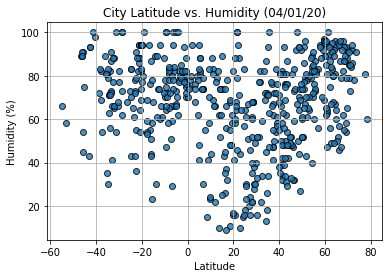

## Latitude vs. Cloudiness Plot

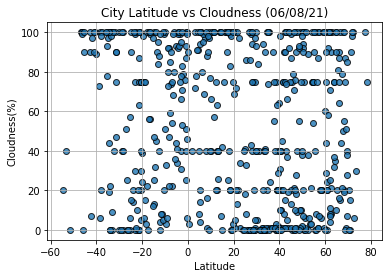

In [42]:
#Build scatter plot for latitude vs Temp
plt.scatter(lats, cloudness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Cloudness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudness(%)")
plt.grid(True)

#Show the figure
plt.savefig("output_data/fig3.png")

#Show the plot
plt.show()

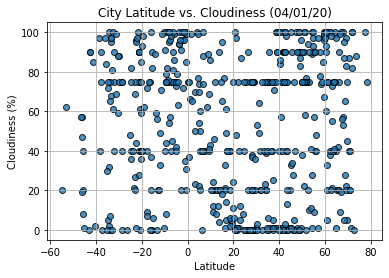

## Latitude vs. Wind Speed Plot

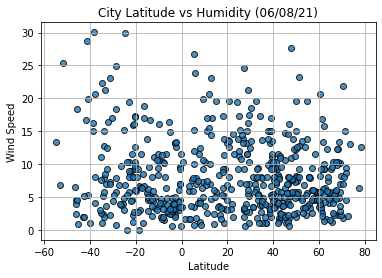

In [43]:
#Build scatter plot for latitude vs Temp
plt.scatter(lats, wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

#Show the figure
plt.savefig("output_data/fig4.png")

#Show the plot
plt.show()

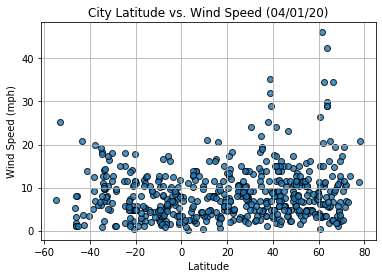

## Linear Regression

In [51]:
# Create Northern and Southern Hemisphere DataFrames
L=0
Northern = city_data_pd.query(f"Lat >= {L}")
Southern = city_data_pd.query(f"Lat <= {L}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient(R^2) is: -0.756766755343451


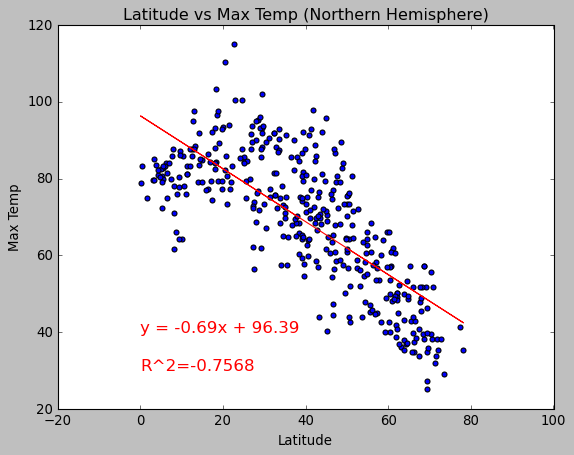

In [57]:
x_values=Northern['Lat']
y_values=Northern['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")

plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Northern Hemisphere)')
plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(0,30),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Max Temp (Northern Hemisphere).png")
plt.show()

The r-value is: 0.46937863826630627


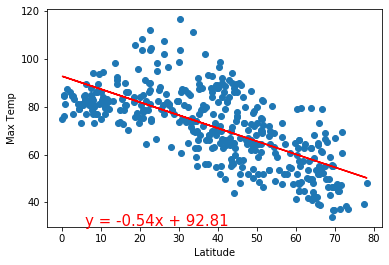

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient(R^2) is: 0.7428779155648243


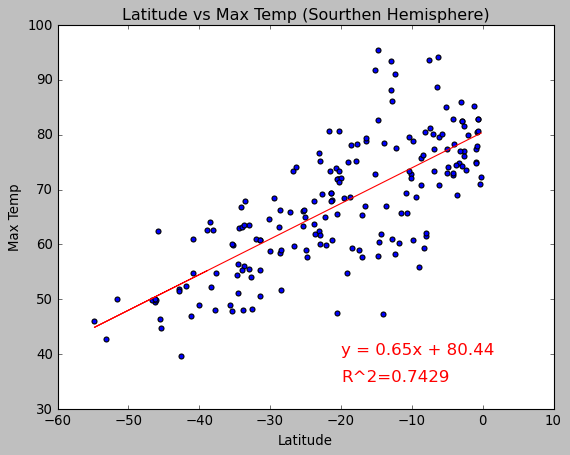

In [61]:
x_values=Southern["Lat"]
y_values=Southern['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")

plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Sourthen Hemisphere)')
plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(-20,35),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Max Temp (Northern Hemisphere).png")
plt.show()

The r-value is: 0.6082708688906918


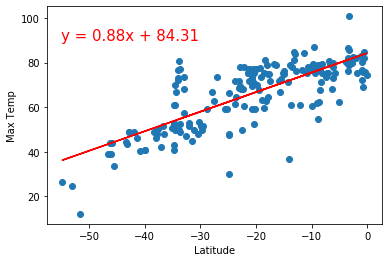

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: 0.11070655699922279


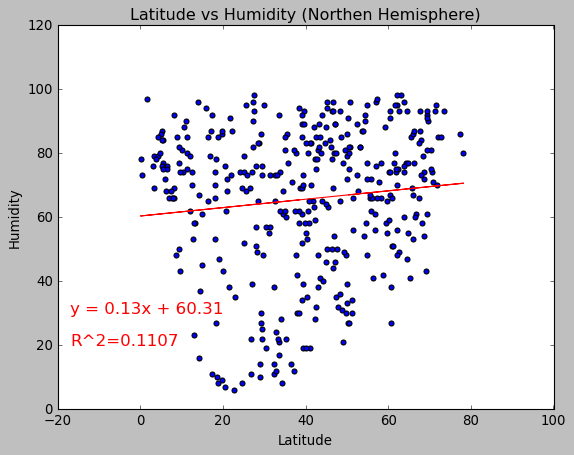

In [64]:
x_values=Northern["Lat"]
y_values=Northern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-17,30),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity (Northen Hemisphere)')
plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(-17,20),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Max Temp (Northern Hemisphere).png")
plt.show()

The r-value is: 0.000543987878808455


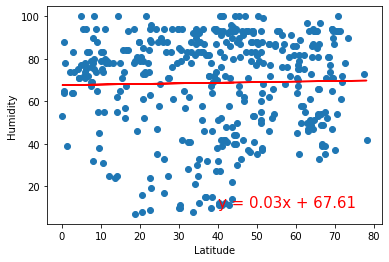

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: -0.033033881324237874


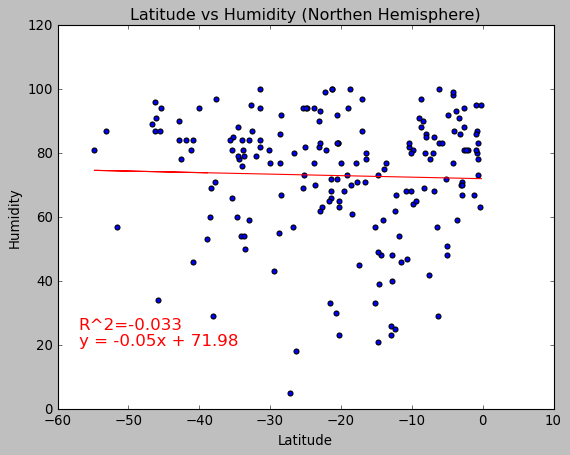

In [69]:
x_values=Southern["Lat"]
y_values=Southern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,20),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity (Northen Hemisphere)')
plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(-57,25),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Humidity (Southern Hemisphere).png")
plt.show()

The r-value is: 0.014985174297345524


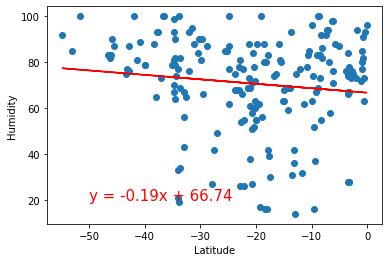

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: -0.07056722977250572


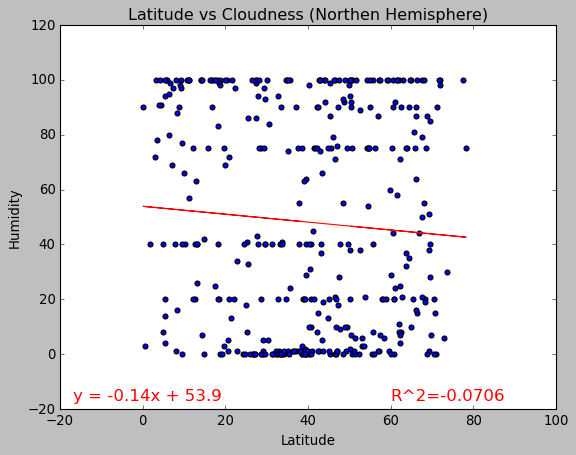

In [71]:
x_values=Northern["Lat"]
y_values=Northern["Cloudness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-17,-17),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudness')
plt.title('Latitude vs Cloudness (Northen Hemisphere)')
plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(60,-17),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Cloudness (Northern Hemisphere).png")
plt.show()

The r-value is: 0.0020898727664228514


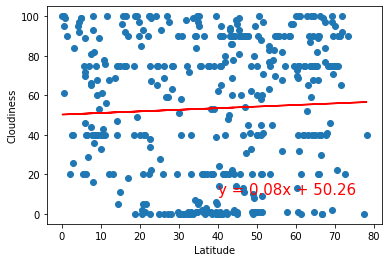

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: 0.018957435410023375


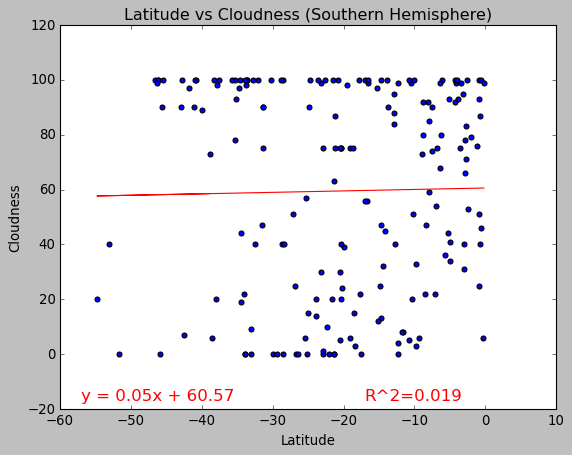

In [77]:
x_values= Southern["Lat"]
y_values= Southern["Cloudness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,-17),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudness')
plt.title('Latitude vs Cloudness (Southern Hemisphere)')
plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(-17,-17),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Cloudness (Southern Hemisphere).png")
plt.show()

The r-value is: 0.0035263772085582894


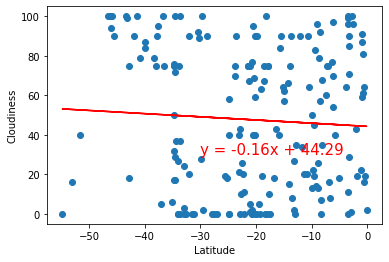

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: -0.10696683830181754


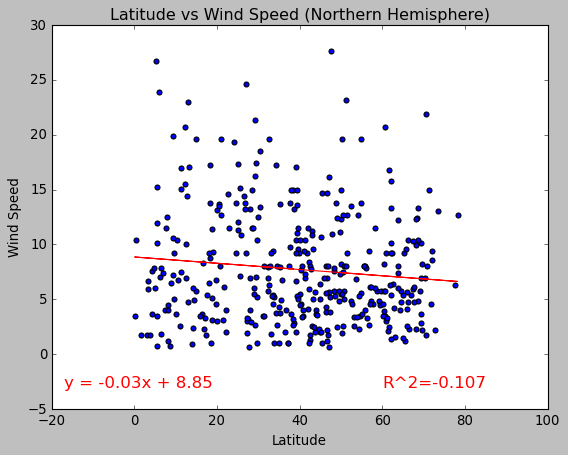

In [84]:
x_values= Northern["Lat"]
y_values= Northern["Wind speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-17,-3),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed (Northern Hemisphere)')
plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(60,-3),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Wind Speed (Northern Hemisphere).png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: -0.24840058514331778


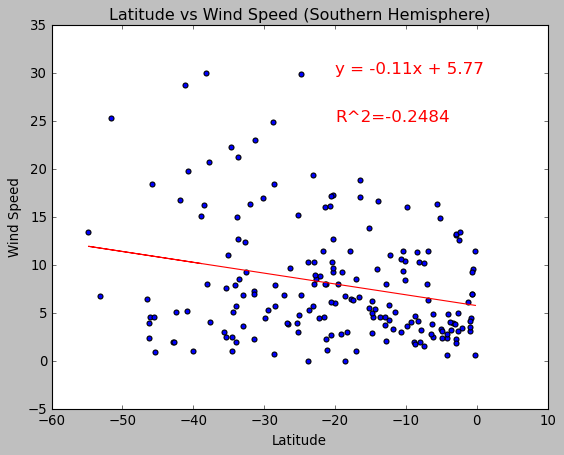

In [80]:
x_values= Southern["Lat"]
y_values= Southern["Wind speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed (Southern Hemisphere)')
plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(-20,25),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Wind Speed (Southern Hemisphere).png")
plt.show()

The r-value is: 0.017128274759839232


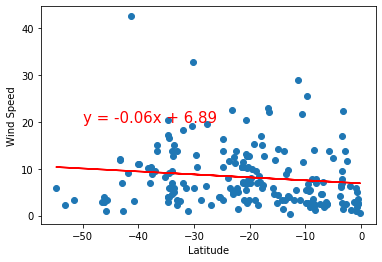